In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# load the dataset
data=pd.read_csv("house_price.csv")
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [5]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [10]:
data.shape

(13200, 7)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [12]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [7]:
print("Null values in each column:")
print(data.isnull().sum())

Null values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [9]:
data.price_per_sqft.isnull().sum()

0

In [11]:
data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

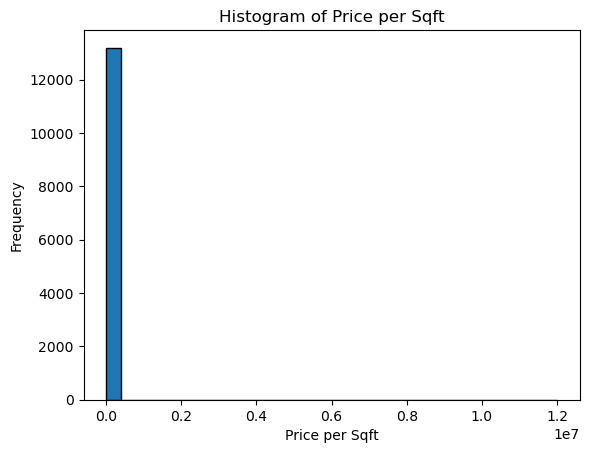

In [13]:
# Histogram of price per sqft
plt.hist(data['price_per_sqft'], bins=30, edgecolor='black')
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Density'>

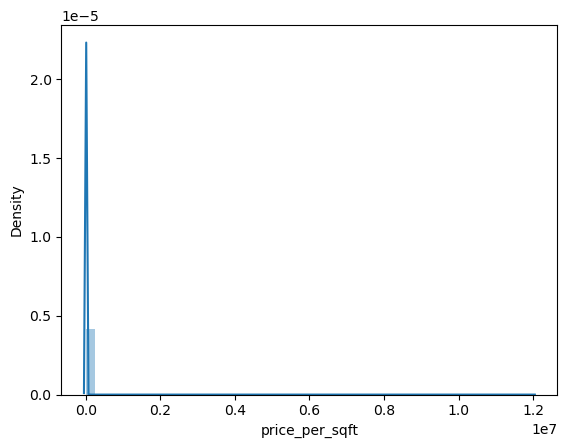

In [15]:
sns.distplot(data["price_per_sqft"])

In [ ]:
OUTLIERS DETECTION AND REMOVAL USING MEAN FUNCTION 

In [53]:
mean_price_per_sqft=data["price_per_sqft"].mean()
mean_price_per_sqft

7920.336742424242

In [55]:
std_deviation_price_per_sqft=data["price_per_sqft"].std()
std_deviation_price_per_sqft

106727.16032810845

In [57]:
threshold = 3


In [59]:
outliers_mean=data[(data["price_per_sqft"]<mean_price_per_sqft-threshold*std_deviation_price_per_sqft)|
(data["price_per_sqft"]>mean_price_per_sqft+threshold*std_deviation_price_per_sqft)]

In [61]:
data_cleaned_mean=data[~data["price_per_sqft"].isin(outliers_mean["price_per_sqft"])]

In [63]:
print("Number of outliers detected using mean function : ",len(outliers_mean))

Number of outliers detected using mean function :  5


In [ ]:
OUTLIERS DETECTION AND REMOVAL USING PERCENTILE METHOD

In [67]:
lower_percentile = data['price_per_sqft'].quantile(0.05)

lower_percentile


3107.8500000000004

In [69]:
upper_percentile = data['price_per_sqft'].quantile(0.95)
upper_percentile

15312.099999999984

In [71]:
# Identify outliers
outliers_percentile = data[(data['price_per_sqft'] < lower_percentile) | (data['price_per_sqft'] > upper_percentile)]

In [73]:
# Removing outliers
data_no_outliers_percentile = data[~data.index.isin(outliers_percentile.index)]

In [77]:
print("Number of outliers detected using percentile method : ",len(outliers_percentile))

Number of outliers detected using percentile method :  1320


In [ ]:
OUTLIERS DETECTION AND REMOVAL USING IQR METHOD

In [81]:
Q1 = data['price_per_sqft'].quantile(0.25)
Q1


4267.0

In [83]:
Q3 = data['price_per_sqft'].quantile(0.75)
Q3


7317.0

In [85]:
IQR = Q3 - Q1
IQR

3050.0

In [95]:
lower_bound=Q1-1.5*IQR
lower_bound

-308.0

In [97]:
upper_bound=Q3+1.5*IQR
upper_bound

11892.0

In [99]:
outliers_IQR=data[(data["price_per_sqft"]<lower_bound)|(data["price_per_sqft"]>upper_bound)]

In [101]:
data_cleaned_IQR=data[~data["price_per_sqft"].isin(outliers_IQR["price_per_sqft"])]

In [103]:
print("Number of outliers detected by IQR method : ",len(outliers_IQR))

Number of outliers detected by IQR method :  1265


In [ ]:
OUTLIERS DETECTION AND REMOVAL USING ZSCORE METHOD

In [105]:
from scipy import stats
# Calculate Z-scores
data['Z_score'] = stats.zscore(data['price_per_sqft'])
data.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391


In [107]:
# Identify outliers
outliers_zscore = data[(data['Z_score'] > 3) | (data['Z_score'] < -3)]


In [109]:
# Removing outliers
data_no_outliers_zscore = data[~data.index.isin(outliers_zscore.index)]

In [111]:
print("Number of outliers detected using Zscore method : ",len(data_no_outliers_zscore))

Number of outliers detected using Zscore method :  13195


In [ ]:
BOXPLOT

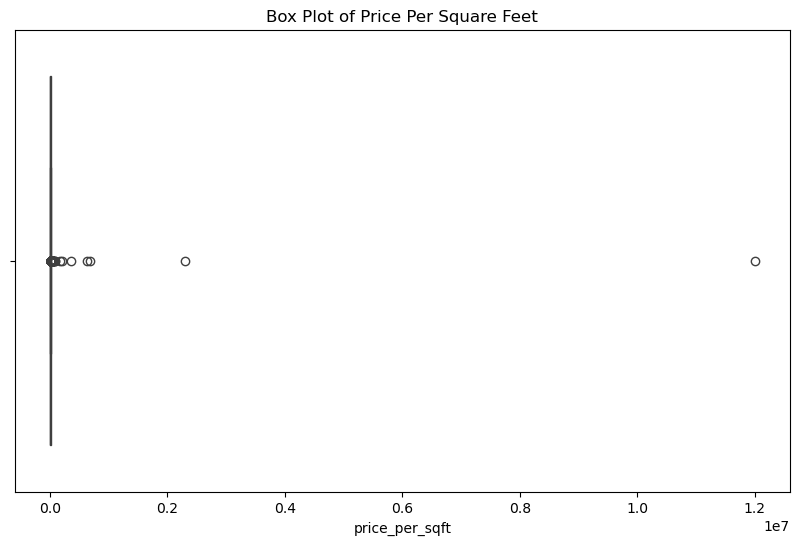

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price_per_sqft'])
plt.title('Box Plot of Price Per Square Feet')
plt.show()

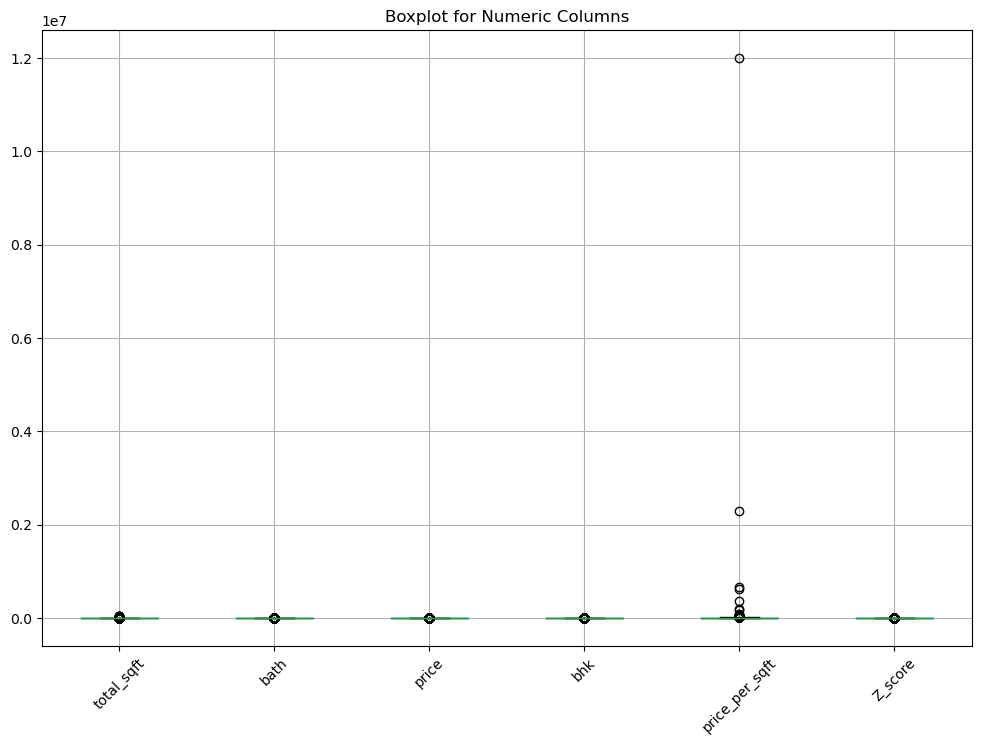

In [60]:
data.boxplot(figsize=(12, 8))
plt.title('Boxplot for Numeric Columns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
HISTPLOT

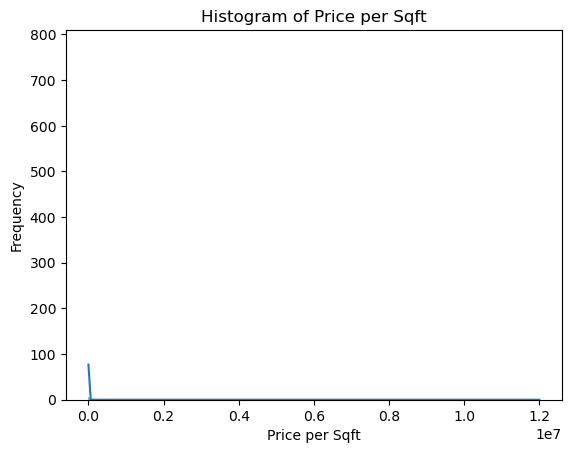

In [64]:
# Histogram of price per sqft
sns.histplot(data['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Skewness and Kurtosis before transformation

In [113]:
print("Skewness before transformation:", data['price_per_sqft'].skew())
print("Kurtosis before transformation:", data['price_per_sqft'].kurtosis())

Skewness before transformation: 108.28105529705168
Kurtosis before transformation: 12095.21502832288


In [115]:
# Log transformation
data['log_price_per_sqft'] = np.log(data['price_per_sqft'])


In [ ]:
 Skewness and Kurtosis after transformation

In [117]:

print("Skewness after transformation:", data['log_price_per_sqft'].skew())
print("Kurtosis after transformation:", data['log_price_per_sqft'].kurtosis())

Skewness after transformation: 1.3998626551353
Kurtosis after transformation: 9.203576429862675


In [ ]:
 Check the correlation between all the numerical columns and plot heatmap.

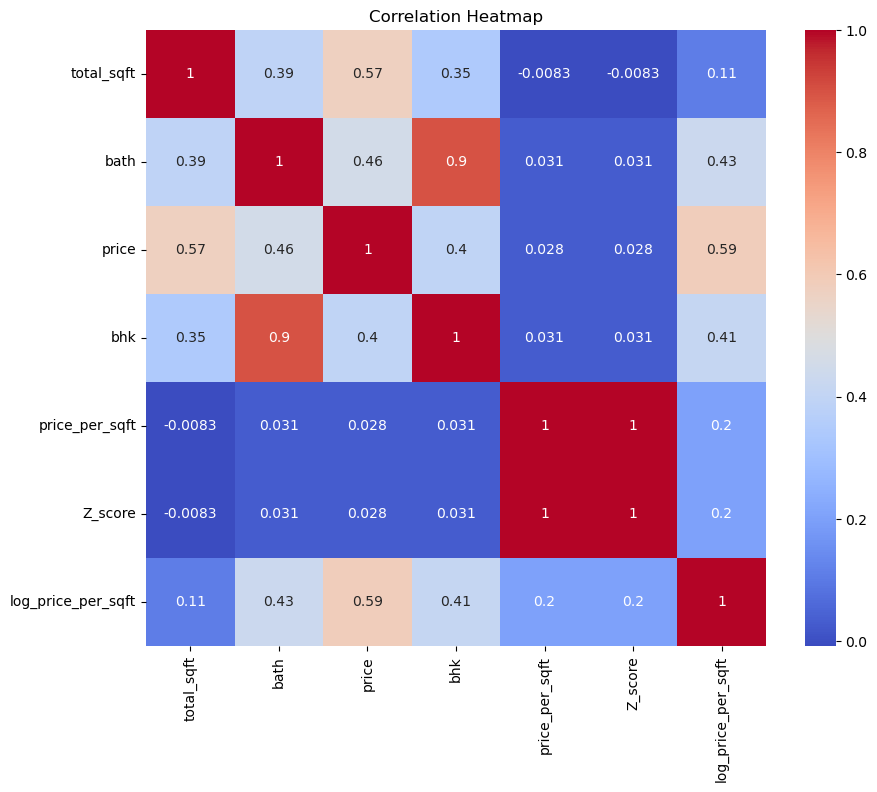

In [123]:
numeric_columns = data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
 Draw Scatter plot between the variables to check the correlation between them.

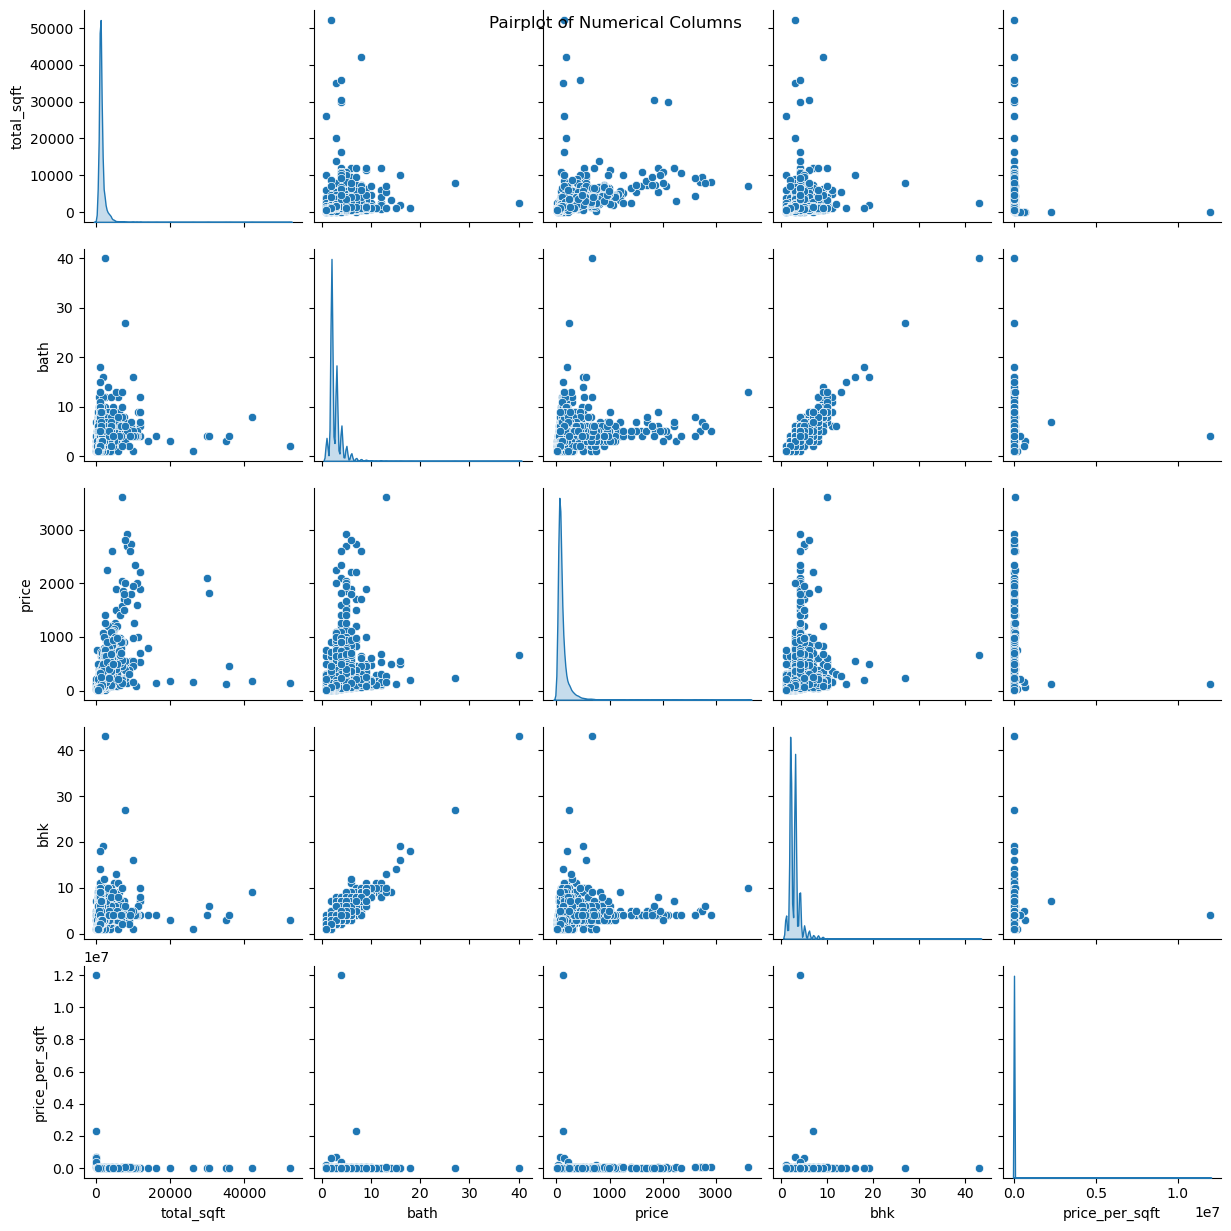

In [10]:
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns')
plt.show()